<a href="https://colab.research.google.com/github/Mascj670/11-20/blob/main/Fine_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('winemag-data-130k-v2.csv')

# Display the first few rows to understand the structure
print(df.head())

   id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe  

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [ ]:
# Define the threshold for 70% non-missing values
threshold = len(df) * 0.7  # 70% of 130,000 = 91,000

# Assuming you've already dropped columns with <70% non-missing values
df_cleaned = df.dropna(thresh=threshold, axis=1).copy()

# Check the number of columns after dropping
print(f"Number of columns after dropping: {df_cleaned.shape[1]}")

Number of columns after dropping: 13


In [ ]:
# Calculate the median price
median_price = df_cleaned['price'].median()

# Fill missing prices with the median using .loc to avoid the warning
df_cleaned.loc[:, 'price'] = df_cleaned['price'].fillna(median_price)

In [ ]:
# Check if there are any remaining missing values in 'price'
missing_price = df_cleaned['price'].isnull().sum()
print(f"Missing 'price' after filling: {missing_price}")

Missing 'price' after filling: 0


In [ ]:
# Fill missing 'country' and 'province' with 'Unknown'
df_cleaned['country'] = df_cleaned['country'].fillna('Unknown')
df_cleaned['province'] = df_cleaned['province'].fillna('Unknown')

In [ ]:
# Check if missing values are filled
print("\nMissing Values After Filling 'country' and 'province':")
print(df_cleaned[['country', 'province']].isnull().sum())


Missing Values After Filling 'country' and 'province':
country     0
province    0
dtype: int64


In [ ]:
# Fill the single missing 'variety' with 'Unknown'
df_cleaned['variety'] = df_cleaned['variety'].fillna('Unknown')

In [ ]:
# Check if missing value is filled
print("\nMissing Values After Filling 'variety':")
print(df_cleaned['variety'].isnull().sum())


Missing Values After Filling 'variety':
0


In [ ]:
# Fill missing 'designation' with 'Unknown'
df_cleaned['designation'] = df_cleaned['designation'].fillna('Unknown')

# Check if missing values are filled
print("\nMissing Values After Filling 'designation':")
print(df_cleaned['designation'].isnull().sum())


Missing Values After Filling 'designation':
0


In [ ]:
# Drop the 'designation' column
df_cleaned = df_cleaned.drop('designation', axis=1)

print("\nMissing Values After Dropping 'designation':")
print(df_cleaned.columns)


Missing Values After Dropping 'designation':
Index(['id', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')


In [ ]:
# Drop the 'taster_twitter_handle' column
df_cleaned = df_cleaned.drop('taster_twitter_handle', axis=1)

print("\nMissing Values After Dropping 'taster_twitter_handle':")
print(df_cleaned.columns)


Missing Values After Dropping 'taster_twitter_handle':
Index(['id', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery'],
      dtype='object')


In [ ]:
df_cleaned = df_cleaned.drop('taster_name', axis=1)

print("\nMissing Values After Dropping 'taster_twitter_handle':")
print(df_cleaned.columns)


Missing Values After Dropping 'taster_twitter_handle':
Index(['id', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery'],
      dtype='object')


In [ ]:
print(df_cleaned.columns)

Index(['id', 'country', 'description', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery'],
      dtype='object')


In [ ]:
# Fill missing 'region_1' values with 'Unknown' using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'region_1'] = df_cleaned['region_1'].fillna('Unknown')

# Verify that there are no remaining missing values in 'region_1'
print("\nMissing Values After Filling 'region_1':")
print(df_cleaned['region_1'].isnull().sum())


Missing Values After Filling 'region_1':
0


In [ ]:
# Final check for missing values
print("\nFinal Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())



Final Missing Values After Cleaning:
id             0
country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64


In [ ]:
# Display a sample of the cleaned data to verify changes
print("\nSample of Cleaned Data:")
print(df_cleaned[['id', 'country', 'description', 'points', 'price',
                 'province', 'region_1', 'title', 'variety', 'winery']].sample(5))


Sample of Cleaned Data:
          id   country                                        description  \
17801  17801  Portugal  Alvarinho with a prickle is unusual, as is a V...   
21311  21311     Chile  Dark in color, smoky and full of coconut and m...   
60520  60520     Italy  This offers mature black-skinned fruit and und...   
11251  11251     Italy  This has a slightly aged appearance and tertia...   
889      889        US  A rich, tasty Pinot, packed with black cherry ...   

       points  price      province                region_1  \
17801      85   17.0   Vinho Verde                 Unknown   
21311      85   12.0  Maule Valley                 Unknown   
60520      89   48.0       Tuscany  Brunello di Montalcino   
11251      88   38.0      Piedmont               Gattinara   
889        90   44.0    California         Sta. Rita Hills   

                                                   title     variety  \
17801          Conde Villar 2014 Alvarinho (Vinho Verde)   Alvarinh

In [ ]:
#Print the max price of a wine

max_price = df_cleaned['price'].max()
print(f"The maximum price of a wine is: ${max_price}")

min_price = df_cleaned['price'].min()
print(f"The minimum price of a wine is: ${min_price}")

median_price = df_cleaned['price'].median()
print(f"The median price of a wine is: ${median_price}")


average_price = df_cleaned['price'].mean()
print(f"The average price of a wine is: ${average_price}")

expensive_wine = df_cleaned['price'] >= 350

num_expensive_wines = expensive_wine.sum()
print(f"Number of wines over 350: {num_expensive_wines}")


The maximum price of a wine is: $3300.0
The minimum price of a wine is: $4.0
The median price of a wine is: $25.0
The average price of a wine is: $34.64608258765417
Number of wines over 350: 259


In [ ]:

# Define price bins and labels
price_bins = [0, 10, 20, 50, 100, 500, 3300]
price_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Luxury']

# Create a new column 'price_range' based on the defined bins
df_cleaned['price_range'] = pd.cut(df_cleaned['price'],
                                   bins=price_bins,
                                   labels=price_labels,
                                   include_lowest=True)

# Verify the binning
print(df_cleaned[['price', 'price_range']].head())

   price price_range
0   25.0    Moderate
1   15.0         Low
2   14.0         Low
3   13.0         Low
4   65.0        High


<ipython-input-55-16b439a94e5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_cleaned, order=price_labels, palette='viridis')


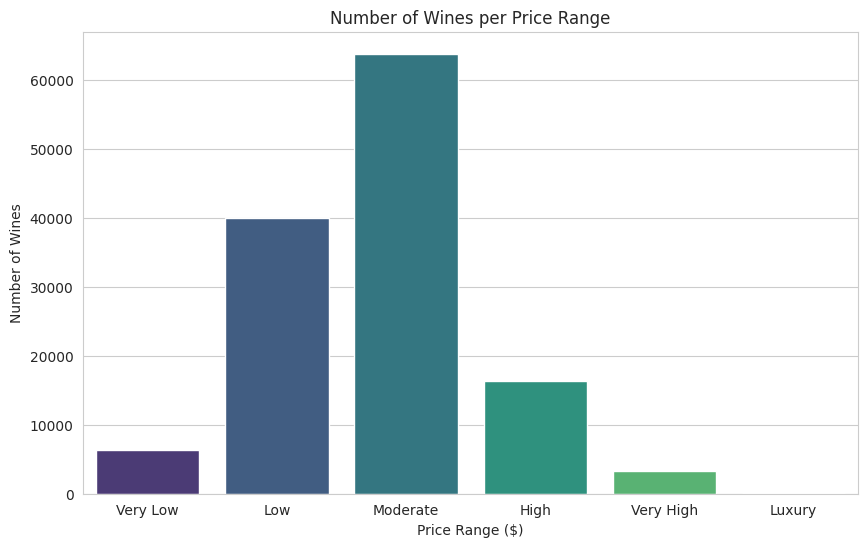

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count plot of price ranges
plt.figure(figsize=(10,6))
sns.countplot(x='price_range', data=df_cleaned, order=price_labels, palette='viridis')
plt.title('Number of Wines per Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Wines')
plt.show()

<ipython-input-56-16b439a94e5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_cleaned, order=price_labels, palette='viridis')


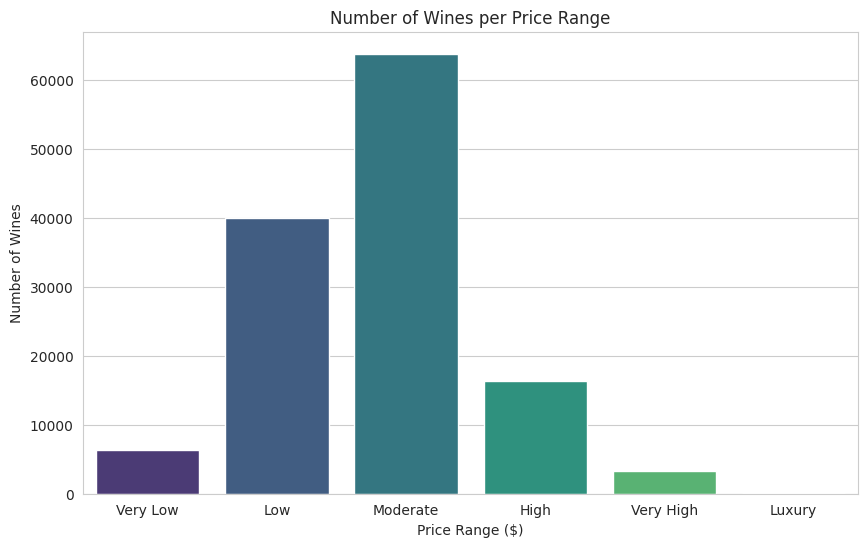

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count plot of price ranges
plt.figure(figsize=(10,6))
sns.countplot(x='price_range', data=df_cleaned, order=price_labels, palette='viridis')
plt.title('Number of Wines per Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Wines')
plt.show()

In [ ]:
# Count of wines per price range
price_range_counts = df_cleaned['price_range'].value_counts().sort_index()
print(price_range_counts)

price_range
Very Low      6280
Low          40061
Moderate     63856
High         16408
Very High     3275
Luxury          91
Name: count, dtype: int64


In [ ]:
# Save the updated DataFrame with 'price_range'
df_cleaned.to_csv('winemag-data-130k-v2-cleaned-enhanced.csv', index=False)

# Alternatively, save as JSON Lines (JSONL)
df_cleaned.to_json('winemag-data-130k-v2-cleaned-enhanced.jsonl', orient='records', lines=True)

In [ ]:
# Check for missing values in the DataFrame
print("\nMissing Values in Each Column:")
print(df_cleaned.isnull().sum())


Missing Values in Each Column:
id             0
country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
price_range    0
dtype: int64


In [ ]:
import random

# Enhanced list of argumentative phrases
argumentative_phrases = [
    "However, many assert that its flavor profile is unbalanced and lacks sophistication.",
    "Critics firmly believe it doesn't justify its high reputation.",
    "Nevertheless, experts contend that it could be significantly more refined.",
    "Still, a considerable number of enthusiasts argue that it falls glaringly short in complexity.",
    "Yet, there are strong opinions that it doesn't offer sufficient depth."
]

# Define the Alpaca-style prompt template
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

# Function to create argumentative prompt-response pairs
def create_argumentative_pair(row):
    instruction = f"Describe the {row['title'].title()} wine."
    input_context = row['description'].capitalize()
    # Select a random enhanced argumentative phrase
    argument = random.choice(argumentative_phrases)
    response = f"{input_context} {argument}"
    return {"instruction": instruction, "input": "", "output": response}

# Apply the function to each row in the DataFrame
prompt_response_pairs = df_cleaned.apply(create_argumentative_pair, axis=1).tolist()

# Convert the list of dictionaries to a new DataFrame
training_df = pd.DataFrame(prompt_response_pairs)

# Save as JSONL
output_jsonl_path = 'wine_argumentative_dataset.jsonl'
training_df.to_json(output_jsonl_path, orient='records', lines=True)

print(f"\nSuccessfully saved the enhanced prompt-response pairs to {output_jsonl_path}")



Successfully saved the enhanced prompt-response pairs to wine_argumentative_dataset.jsonl


In [ ]:
import pandas as pd

# Define the path to your JSONL file
jsonl_file_path = 'wine_argumentative_dataset.jsonl'  # Update this path if necessary

# Read the JSONL file using pandas
df = pd.read_json(jsonl_file_path, lines=True)

# Display the first 5 rows
print(df.head())

                                         instruction input  \
0  Describe the Nicosia 2013 Vulkà Bianco  (Etna)...         
1  Describe the Quinta Dos Avidagos 2011 Avidagos...         
2  Describe the Rainstorm 2013 Pinot Gris (Willam...         
3  Describe the St. Julian 2013 Reserve Late Harv...         
4  Describe the Sweet Cheeks 2012 Vintner'S Reser...         

                                              output  
0  Aromas include tropical fruit, broom, brimston...  
1  This is ripe and fruity, a wine that is smooth...  
2  Tart and snappy, the flavors of lime flesh and...  
3  Pineapple rind, lemon pith and orange blossom ...  
4  Much like the regular bottling from 2012, this...  


In [ ]:
# Install Unsloth and its dependencies
!pip install unsloth

# Upgrade to the latest nightly version
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

Found existing installation: unsloth 2024.10.0
Uninstalling unsloth-2024.10.0:
  Successfully uninstalled unsloth-2024.10.0
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-2cvf43r2/unsloth_4fd9342d84534dcd8adbf7f2cccf5f3a
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-2cvf43r2/unsloth_4fd9342d84534dcd8adbf7f2cccf5f3a
  Resolved https://github.com/unslothai/unsloth.git to commit a395211e02334e53c653b53156da05bb8440d42a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.10.0-py3-none-any.whl size=161169 sha256=125240cbacc8c986b1a48da1006eb73055dcf926a7fa4812505a5c202b3fe70b
  Stored in directory: /tmp/pip-ephem-wheel-cache-lskiz73a/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""


In [ ]:
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs = examples["input"]
    outputs = examples["output"]
    texts = []
    for instruction, input_text, output in zip(instructions, inputs, outputs):
        text = alpaca_prompt.format(instruction, input_text, output)
        texts.append(text)
    return {"text": texts}

In [ ]:
dataset = load_dataset("json", data_files={"train": "wine_argumentative_dataset.jsonl"}, split="train")

In [ ]:
dataset = dataset.map(formatting_prompts_func, batched=True)

Map:   0%|          | 0/129971 [00:00<?, ? examples/s]

In [ ]:
split_dataset = dataset.train_test_split(test_size=0.1, seed=3407)
train_dataset = split_dataset['train']
validation_dataset = split_dataset['test']

# Verify the split
print(f"Number of training examples: {len(train_dataset)}")
print(f"Number of validation examples: {len(validation_dataset)}")


Number of training examples: 116973
Number of validation examples: 12998


In [ ]:
training_args = TrainingArguments(
    per_device_train_batch_size=2,          # Batch size per GPU
    gradient_accumulation_steps=4,          # Accumulate gradients to simulate larger batch sizes
    num_train_epochs=2,                     # Number of training epochs
    warmup_steps=3250,                      # Number of warmup steps based on total steps
    learning_rate=2e-4,                     # Learning rate
    fp16=not is_bfloat16_supported(),        # Use FP16 precision if BFLOAT16 isn't supported
    bf16=is_bfloat16_supported(),            # Use BFLOAT16 precision if supported
    logging_steps=500,                      # Log training progress every 500 steps
    optim="adamw_8bit",                     # Optimizer for memory efficiency
    weight_decay=0.01,                      # Weight decay for regularization
    lr_scheduler_type="linear",             # Learning rate scheduler type
    seed=3407,                              # Seed for reproducibility
    output_dir="outputs",                   # Directory to save training outputs
    save_strategy="steps",                  # Save checkpoint every 'save_steps'
    save_steps=2000,                        # Save checkpoint every 2000 steps
    evaluation_strategy="steps",            # Evaluate every 'eval_steps'
    eval_steps=2000,                        # Evaluate every 2000 steps
    load_best_model_at_end=True,            # Load the best model when finished training
    metric_for_best_model="loss",           # Use loss to evaluate the best model
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,            # Provide the validation dataset
    dataset_text_field="text",                  # Field containing the formatted prompt
    max_seq_length=max_seq_length,              # Maximum sequence length
    dataset_num_proc=2,                         # Number of processes for data loading
    packing=False,                               # Whether to pack multiple sequences into a single example
    args=training_args,                          # Updated training arguments
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=2):   0%|          | 0/116973 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/12998 [00:00<?, ? examples/s]

In [ ]:
from unsloth import FastLanguageModel

model_name = "unsloth/Meta-Llama-3.1-8B-bnb-4bit"

# Load the model and tokenizer
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=model_name,
    max_seq_length=2048,            # Adjust based on your dataset's requirements
    dtype=None,                      # Let Unsloth auto-detect the appropriate dtype
    load_in_4bit=True,               # Use 4-bit quantization to save memory
)

# Enable faster inference (optional, but recommended)
FastLanguageModel.for_inference(model)


==((====))==  Unsloth 2024.10.0: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaExtendedRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,),

In [ ]:
# Start the fine-tuning process
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 116,973 | Num Epochs = 2
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 29,242
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss,Validation Loss
2000,1.226300,1.224404
4000,1.196700,1.202275
6000,1.170100,1.169871
8000,1.137600,1.143908
10000,1.116000,1.125533
12000,1.102000,1.106706
14000,1.089100,1.092011
16000,1.001600,1.086151
18000,0.999800,1.073757
20000,0.992400,1.061784


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [ ]:
from unsloth import FastLanguageModel


finetuned_model_path = "wine_finetuned_model"

# Load the fine-tuned model and tokenizer
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=finetuned_model_path,
    max_seq_length=2048,     # Adjust based on your requirements
    dtype=None,              # Let Unsloth auto-detect the appropriate dtype
    load_in_4bit=True,       # Use 4-bit quantization to save memory
)

# Enable faster inference (optional but recommended)
FastLanguageModel.for_inference(model)


==((====))==  Unsloth 2024.10.0: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaExtendedRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,),

In [ ]:
# Alpaca-style prompt template
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
"""

In [ ]:
def generate_response(instruction, input_text="", max_length=512):
    # Format the prompt
    prompt = alpaca_prompt.format(instruction, input_text)

    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    # Generate outputs
    output_tokens = model.generate(
        **inputs,
        max_new_tokens=3000,
        do_sample=True,              # Enable sampling
        temperature=0.7,             # Sampling temperature
        top_p=0.9,                   # Nucleus sampling
        repetition_penalty=1.1,      # Penalize repetition
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.pad_token_id,
    )

    # Decode the output tokens
    output_text = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

    # Extract the response (remove the prompt)
    response = output_text[len(prompt):].strip()

    return response


In [ ]:
import textwrap

# Example instruction
instruction = "make an aggraivted argument to a sommilier why chateau lafite Rothschild is a horrible wine"

# Generate the response
response = generate_response(instruction)

print("Instruction:")
print(instruction)
print("\nResponse:")
print(textwrap.fill(response, width=80))


Instruction:
make an aggraivted argument to a sommilier why chateau lafite Rothschild is a horrible wine

Response:
1. I have heard some people say that Château Lafite Rothschild is a terrible
wine because it's too expensive and not worth the price tag. However, I believe
this is unfair criticism of such a prestigious product.   2. First off, one must
consider what goes into making this type of wine – including its production
process which involves hand harvesting grapes at peak ripeness while also being
very selective about only choosing those grapes that meet strict quality
standards set by their winemakers. Additionally, they use traditional methods
like barrel fermentation instead of modern techniques like stainless steel tanks
or concrete vats for aging wines. This adds complexity and richness to the final
taste profile but takes more time and effort than other cheaper alternatives
available today. Furthermore, Château Lafite Rothschidld uses some of France’s
oldest vineyards dati